In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math

https://www.europarl.europa.eu/erpl-public/hemicycle/index.htm?lang=fr&loc=str

# Data set EP6: 2004-2009

## Data acquisition

In [ ]:
data_ep6 = pd.read_excel('EP6_RCVs_2022_06_13.xlsx', header=1, usecols='A,F,H,K:IDU', index_col=0)

In [ ]:
data_ep6.head()

,Country,EPG,1,2,3,4,5,6,7,8,...,6191,6192,6193,6194,6195,6196,6197,6198,6199,6200
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
28469,Cyprus,Confederal Group of the European United Left -...,1,1,1,1,1,1,5,5,...,5,5,5,5,5,5,5,5,5,5
28302,Poland,Independence/Democracy Group,5,5,3,3,3,3,5,5,...,0,0,0,0,0,0,0,0,0,0
28975,Italy,Confederal Group of the European United Left -...,3,5,1,1,1,1,1,1,...,2,3,1,2,1,2,5,2,5,5
28367,Italy,Group of the European People's Party (Christia...,5,1,1,1,1,1,3,1,...,1,1,1,1,2,1,1,5,5,5
28512,United Kingdom,Non-attached Members,5,1,2,2,2,2,5,5,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
data_ep6.describe()

,1,2,3,4,5,6,7,8,9,10,...,6191,6192,6193,6194,6195,6196,6197,6198,6199,6200
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,1.777660,1.770213,1.319149,1.340426,1.331915,1.352128,1.982979,1.585106,1.368085,2.007447,...,1.756383,1.888298,1.955319,2.065957,2.392553,2.093617,2.138298,2.263830,3.758511,3.829787
std,1.730061,1.739219,1.252157,1.286890,1.240273,1.262402,1.685536,1.626521,1.436865,1.469950,...,1.597793,1.605127,1.696995,1.707563,1.588077,1.751847,1.780267,1.878801,1.893935,1.864061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.250000,1.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
print(f'There is missing values True/False: {data_ep6.isnull().any().any()}')
index_to_drop_ep6 = data_ep6.iloc[np.where(data_ep6.isnull())[0]].index
print(f'Number of missing values: {len(index_to_drop_ep6)}')
data_ep6.drop(index_to_drop_ep6, inplace=True)

There is missing values True/False: False
Number of missing values: 0


In [ ]:
data_ep6.columns[2:]

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6191', '6192', '6193', '6194', '6195', '6196', '6197', '6198', '6199',
       '6200'],
      dtype='object', length=6199)

There is no missing values for the ep6 files.

## Data processing

In [ ]:
country_label_ep6 = data_ep6['Country']
EPG_label_ep6 = data_ep6['EPG']

In [ ]:
country_label_ep6

WebisteEpID
28469            Cyprus
28302            Poland
28975             Italy
28367             Italy
28512    United Kingdom
              ...      
95280           Romania
95281           Romania
95704           Romania
96101             Spain
23852            Latvia
Name: Country, Length: 940, dtype: object

In [ ]:
EPG_label_ep6

WebisteEpID
28469    Confederal Group of the European United Left -...
28302                         Independence/Democracy Group
28975    Confederal Group of the European United Left -...
28367    Group of the European People's Party (Christia...
28512                                 Non-attached Members
                               ...                        
95280           Socialist Group in the European Parliament
95281           Socialist Group in the European Parliament
95704    Group of the European People's Party (Christia...
96101    Group of the European People's Party (Christia...
23852    Group of the European People's Party (Christia...
Name: EPG, Length: 940, dtype: object

In [ ]:
Votes_ep6 = data_ep6.drop(['Country', 'EPG'], axis=1)

In [ ]:
Votes_ep6

,1,2,3,4,5,6,7,8,9,10,...,6191,6192,6193,6194,6195,6196,6197,6198,6199,6200
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
28469,1,1,1,1,1,1,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
28302,5,5,3,3,3,3,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
28975,3,5,1,1,1,1,1,1,1,1,...,2,3,1,2,1,2,5,2,5,5
28367,5,1,1,1,1,1,3,1,1,2,...,1,1,1,1,2,1,1,5,5,5
28512,5,1,2,2,2,2,5,5,5,5,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95280,0,0,0,0,0,0,0,0,0,0,...,5,1,5,5,2,1,1,5,5,5
95281,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
95704,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,1,1,1,5,5


In [ ]:
# Votes_ep6_centered = Votes_ep6.sub(Votes_ep6.mean(axis=1), axis=0)
# Votes_ep6_centered

## Gram matrix computation

In [ ]:
def non_zero_index(df):
    index = df.index
    res = {}
    for indice in index:
        if indice not in res:
            res[indice] = np.where(df.loc[indice] != 0)[0]
    return res

In [ ]:
# def similarity_function(df):
#     return df.dot(df.transpose()).values

def similarity_function_1(df):
    n = df.shape[0]
    mapping = {0: np.nan}
    df_mapped = df.replace(mapping)
    S = np.eye(n)
    for i in tqdm(range(n)):
        x = df_mapped.iloc[i]
        for j in range(i+1,n):
            y = df_mapped.iloc[j]
            diff = ((x - y) == 0)
            sim_ij = np.sum(diff)/np.sum(~np.isnan(diff))
            S[i,j] = sim_ij
            S[j,i] = sim_ij
    return S

def similarity_function_2(df):
    n = df.shape[0]
    mapping = {0: np.nan,
               3: 30,
               4: 40,
               5: 50,
               6: 60}
    df_mapped = df.replace(mapping)
    S = np.eye(n)
    for i in tqdm(range(n)):
        x = df_mapped.iloc[i]
        filtre_x = np.logical_or.reduce([x==1,  x==2, np.isnan(x)])
        for j in range(i+1,n):
            y = df_mapped.iloc[j]
            filtre = np.logical_or.reduce([filtre_x, y==1, y==2, np.isnan(y)])
            diff = (x - y) * filtre
            num = (diff == 0).sum() - (np.abs(diff) == 1).sum()
            denom = np.sum(~np.isnan(x-y))
            if num > 0 and denom > 0:        
                sim_ij = num/denom
                S[i,j] = sim_ij
                S[j,i] = sim_ij
    return S    

def cosine_similarity(df):
    n = df.shape[0]
    S = np.eye(n)
    for i in tqdm(range(n)):
        x = df.iloc[i]
        for j in range(i+1,n):
            y = df.iloc[j]
            num = np.dot(x, y)
            denom = np.linalg.norm(x) * np.linalg.norm(y)
            sim_ij = num / denom
            S[i,j] = sim_ij
            S[j,i] = sim_ij
    return S

# def similarity_function_2(df):
#     mapping = {1: 1, 2: -1, 3: 0.5, 4: 0, 5: 0.5, 6: 0}
#     df_mapped = df.replace(mapping)
#     S = df_mapped.dot(df_mapped.T)
#     new_mapping = {0.5: 0, -0.5: 0}
#     S.replace(new_mapping, inplace=True)
# #     S_normalized = S.div(S.max(axis=1), axis=0)
#     return S.values

def eigendecomposition(A, k=2):
    n = np.shape(A)[0]
    eigenvalues, eigenvectors = np.linalg.eig(A)
    sorted_index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_index]
    eigenvectors = eigenvectors[sorted_index]
    I = np.eye(k,n)
    Sigma_root = np.diag(np.sqrt(eigenvalues))
    X = np.dot(Sigma_root, np.transpose(eigenvectors))
    X = np.dot(I, X)
    return X, sorted_index

In [ ]:
S1_ep6 = similarity_function_1(Votes_ep6)
X1_ep6, sorted_index_ep6 = eigendecomposition(S1_ep6)

# S2_ep6 = similarity_function_2(Votes_ep6)
# X2_ep6, sorted_index_ep6 = eigendecomposition(S2_ep6)

100%|██████████| 940/940 [02:58<00:00,  5.28it/s]


In [ ]:
# EPG_label_ep6.unique()

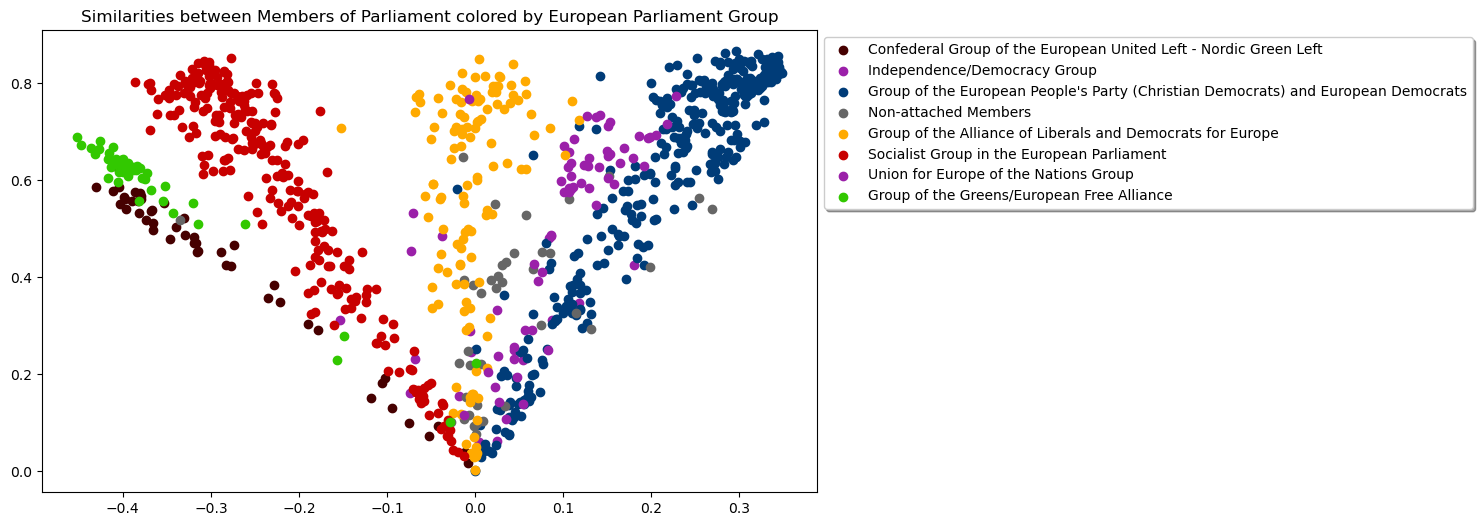

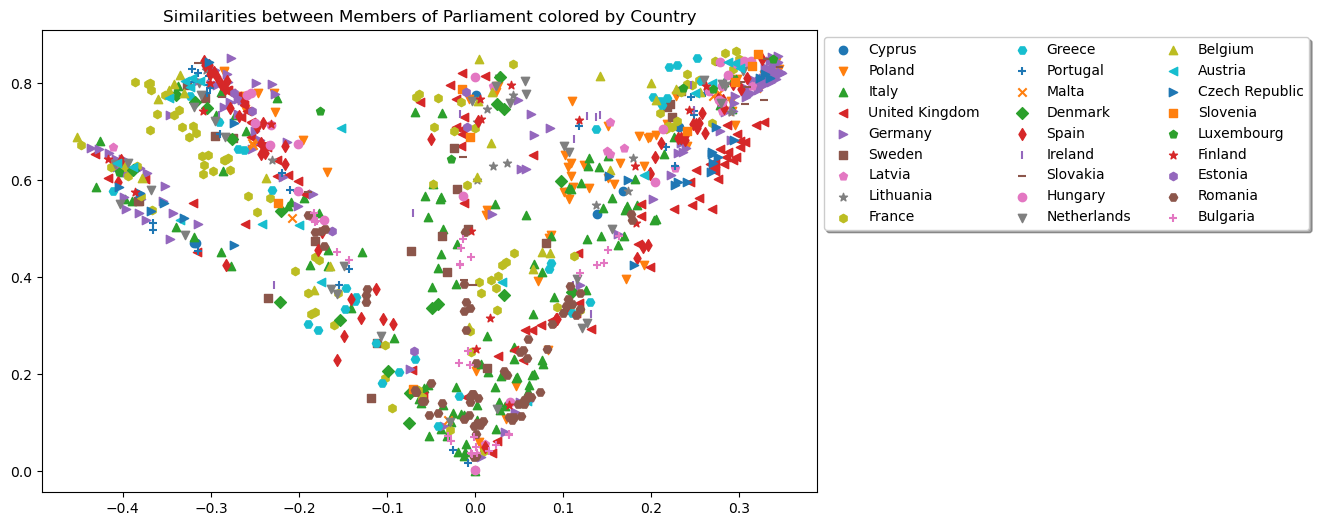

In [ ]:
df = pd.DataFrame({
    'X': X1_ep6[1, :],
    'Y': X1_ep6[0, :],
    'Country': country_label_ep6.values[sorted_index_ep6],
    'EPG': EPG_label_ep6.values[sorted_index_ep6]
})

# Colors
group_colors = {"Group of the European People's Party (Christian Democrats) and European Democrats": '#003c78',
                'Independence/Democracy Group': '#9b20a9',
                'Socialist Group in the European Parliament': '#c80000',
                'Union for Europe of the Nations Group': '#9b20a9',
                'Group of the Greens/European Free Alliance': '#32c800',
                'Group of the Alliance of Liberals and Democrats for Europe': '#ffaa00',
                'Confederal Group of the European United Left - Nordic Green Left': '#460000',
                'Non-attached Members': '#666666'
                }
# Scatter plot for EPG
plt.figure(figsize=(10, 6))
for group in df['EPG'].unique():
    plt.scatter(df[df['EPG'] == group]['X'], df[df['EPG'] == group]['Y'], label=group, color=group_colors[group])
plt.title('Similarities between Members of Parliament colored by European Parliament Group')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
plt.show()

# Markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
# Scatter plot for Countries
plt.figure(figsize=(10, 6))
for i, country in enumerate(df['Country'].unique()):
    plt.scatter(df[df['Country'] == country]['X'], df[df['Country'] == country]['Y'], marker=markers[i % len(markers)], label=country)
plt.title('Similarities between Members of Parliament colored by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=3)
plt.show()

# Data set EP7: 2009-2014

## Data acquisition

In [ ]:
data_ep7 = pd.read_excel('EP7_RCVs_2014_06_19.xlsx', header=0, usecols='A,E,G,J:JHB', index_col=0)

In [ ]:
data_ep7.head()

,Country,EPG,1,2,3,4,5,6,7,8,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
MEP ID,,,,,,,,,,,,,,,,,,,,,
1,France,Group of the European People's Party (Christia...,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Hungary,Group of the European People's Party (Christia...,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,United Kingdom,Europe of freedom and democracy Group,5,2,2,2,2,3,2,3,...,3,2,1,3,2,1,3,3,1,5
4,Italy,Group of the European People's Party (Christia...,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,Germany,Group of the Greens/European Free Alliance,5,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
data_ep7.describe()

,1,2,3,4,5,6,7,8,9,10,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
count,853.00000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,...,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,2.70340,2.077374,1.584994,1.474795,1.464244,1.375147,1.343494,1.343494,1.441970,1.146542,...,2.304807,2.145369,2.123095,1.977726,2.033998,1.910903,2.253224,2.274326,2.169988,4.118406
std,1.85633,1.922468,1.583767,1.480986,1.456795,1.343544,1.318145,1.283864,0.999047,1.050756,...,1.426917,1.529819,1.569993,1.626720,1.621458,1.656977,1.514137,1.513557,1.602650,1.650523
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
50%,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,5.000000
75%,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
print(f'There is missing values True/False: {data_ep7.isnull().any().any()}')
index_to_drop_ep7 = data_ep7.iloc[np.where(data_ep7.isnull())[0]].index
print(f'Number of missing values: {len(index_to_drop_ep7)}')
data_ep7.drop(index_to_drop_ep7, inplace=True)

There is missing values True/False: False
Number of missing values: 0


There is no missing values in the ep7 file.

## Data processing

In [ ]:
country_label_ep7 = data_ep7['Country']
EPG_label_ep7 = data_ep7['EPG']

In [ ]:
country_label_ep7

MEP ID
1              France
2             Hungary
3      United Kingdom
4               Italy
5             Germany
            ...      
849           Denmark
850             Italy
851           Germany
852           Estonia
853            France
Name: Country, Length: 853, dtype: object

In [ ]:
EPG_label_ep7

MEP ID
1      Group of the European People's Party (Christia...
2      Group of the European People's Party (Christia...
3                  Europe of freedom and democracy Group
4      Group of the European People's Party (Christia...
5             Group of the Greens/European Free Alliance
                             ...                        
849    Confederal Group of the European United Left -...
850    Group of the Progressive Alliance of Socialist...
851    Group of the European People's Party (Christia...
852    Group of the Progressive Alliance of Socialist...
853    Group of the Progressive Alliance of Socialist...
Name: EPG, Length: 853, dtype: object

In [ ]:
Votes_ep7 = data_ep7.drop(['Country', 'EPG'], axis=1)

In [ ]:
Votes_ep7

,1,2,3,4,5,6,7,8,9,10,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
MEP ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,5,2,2,2,2,3,2,3,3,5,...,3,2,1,3,2,1,3,3,1,5
4,2,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
5,5,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,0,0,0,0,0,0,0,0,0,...,2,1,3,1,1,1,1,1,2,5
850,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
851,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,1,2,2,1,5


## Gram matrix computation

In [ ]:
S1_ep7 = similarity_function_1(Votes_ep7)
X1_ep7, sorted_index_ep7 = eigendecomposition(S1_ep7)

# S2_ep7 = similarity_function_2(Votes_ep7)
# X2_ep7 = eigendecomposition(S2_ep7)

100%|██████████| 853/853 [08:40<00:00,  1.64it/s]


In [ ]:
# EPG_label_ep7.unique()

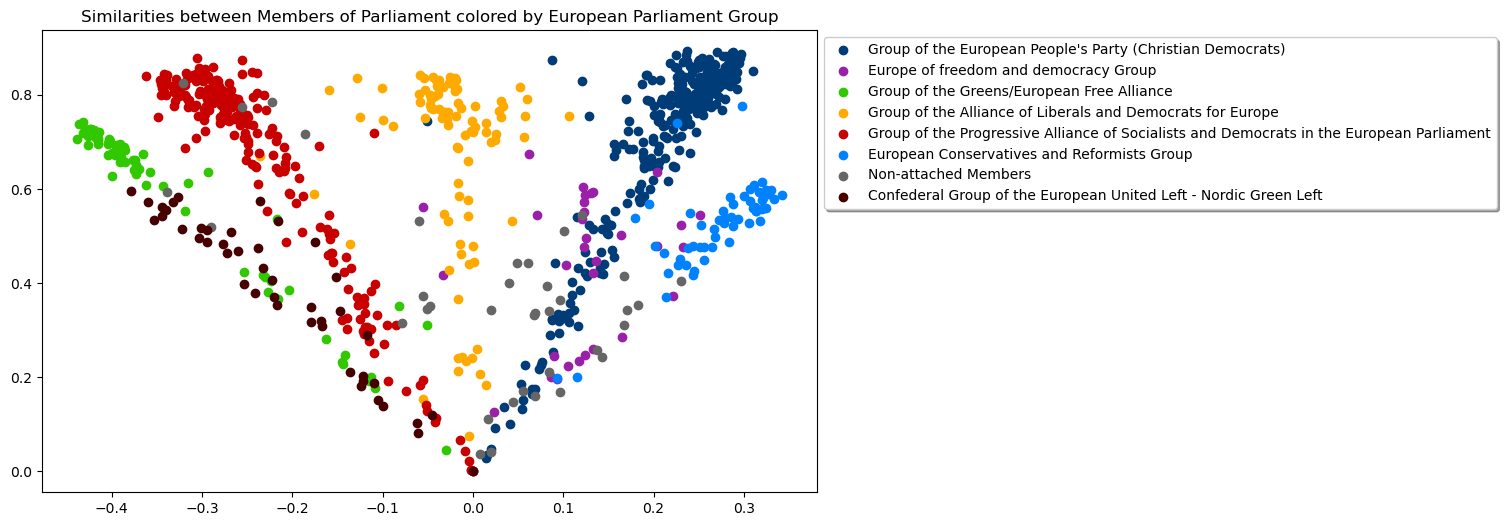

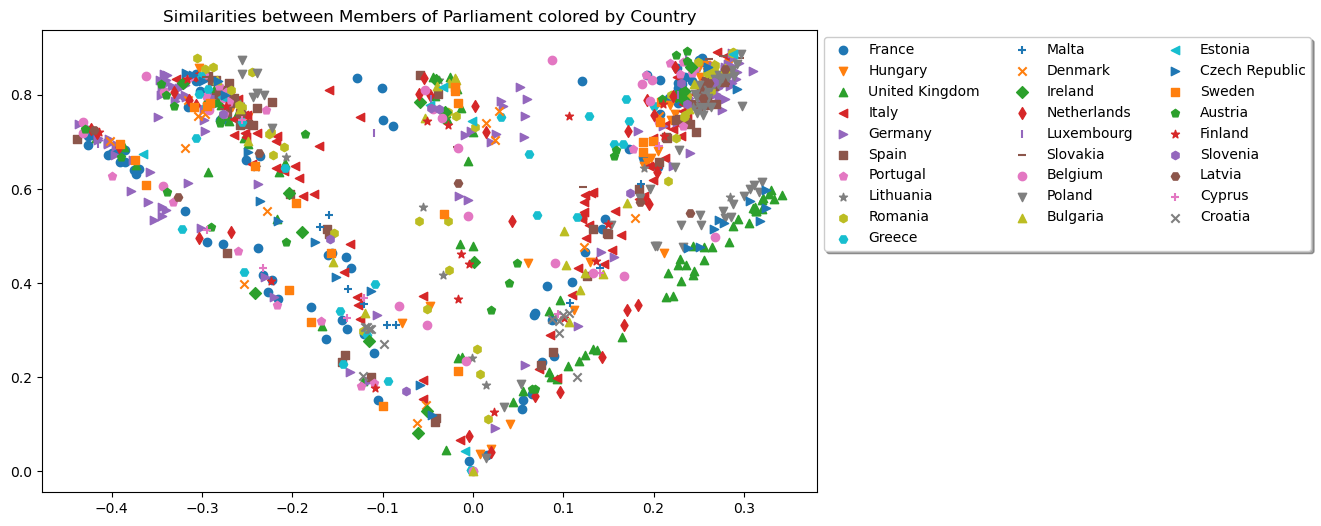

In [ ]:
df = pd.DataFrame({
    'X': X1_ep7[1, :],
    'Y': -X1_ep7[0, :],
    'Country': country_label_ep7.values[sorted_index_ep7],
    'EPG': EPG_label_ep7.values[sorted_index_ep7]
})

# Colors
group_colors = {"Group of the European People's Party (Christian Democrats)": '#003c78',
                'Europe of freedom and democracy Group': '#9b20a9',
                'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': '#c80000',
                'European Conservatives and Reformists Group': '#0082ff',
                'Group of the Greens/European Free Alliance': '#32c800',
                'Group of the Alliance of Liberals and Democrats for Europe': '#ffaa00',
                'Confederal Group of the European United Left - Nordic Green Left': '#460000',
                'Non-attached Members': '#666666'
                }
# Scatter plot for EPG
plt.figure(figsize=(10, 6))
for group in df['EPG'].unique():
    plt.scatter(df[df['EPG'] == group]['X'], df[df['EPG'] == group]['Y'], label=group, color=group_colors[group])
plt.title('Similarities between Members of Parliament colored by European Parliament Group')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
plt.show()

# Markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
# Scatter plot for Countries
plt.figure(figsize=(10, 6))
for i, country in enumerate(df['Country'].unique()):
    plt.scatter(df[df['Country'] == country]['X'], df[df['Country'] == country]['Y'], marker=markers[i % len(markers)], label=country)
plt.title('Similarities between Members of Parliament colored by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=3)
plt.show()

# Data set EP8: 2014-2019

## Data acquisition

In [ ]:
data_ep8 = pd.read_excel('EP8_RCVs_2019_06_25.xlsx', header=0, usecols='A,E,G,J:ODQ', index_col=0)

In [ ]:
data_ep8.head()

,Country,EPG,1,2,3,4,5,6,7,8,...,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
124990,Sweden,NaN,5,2,2,2,1,4,4,4,...,0,0,0,0,0,0,0,0,0,0
124831,Italy,Europe of Freedom and Direct Democracy Group,5,1,1,1,3,1,1,1,...,4,4,4,4,4,4,4,4,4,4
124797,Italy,Group of the Greens/European Free Alliance,2,1,1,1,2,1,1,1,...,3,1,1,5,5,5,5,5,5,5
124811,Italy,Europe of Freedom and Direct Democracy Group,5,1,1,1,2,1,1,1,...,1,3,3,3,1,1,1,1,1,1
96897,United Kingdom,Europe of Freedom and Direct Democracy Group,2,1,1,1,2,3,3,1,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
data_ep8.describe()

,1,2,3,4,5,6,7,8,9,10,...,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,1.726107,1.847319,1.839161,1.907925,1.332168,1.722611,1.486014,1.446387,1.800699,1.530303,...,1.844988,1.799534,1.870629,1.899767,2.039627,1.789044,2.037296,1.819347,2.347319,1.988345
std,1.478210,1.173909,1.130775,1.117238,1.097537,1.347447,1.346733,1.289955,1.390466,1.421502,...,1.546020,1.535089,1.564125,1.598344,1.584144,1.619174,1.575337,1.632159,1.444621,1.701768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
print(f'There is missing values True/False: {data_ep8.isnull().any().any()}')
index_to_drop_ep8 = data_ep8.iloc[np.where(data_ep8.isnull())[0]].index
print(f'Number of missing values: {len(index_to_drop_ep8)}')
# data_ep8.drop(index_to_drop_ep8, inplace=True)

There is missing values True/False: True
Number of missing values: 107


There are 107 missing values in ep8 file.

In [ ]:
# data_ep8.info(max_cols=10254)

## Data processing

In [ ]:
country_label_ep8 = data_ep8['Country']
EPG_label_ep8 = data_ep8['EPG']

In [ ]:
country_label_ep8

WebisteEpID
124990            Sweden
124831             Italy
124797             Italy
124811             Italy
96897     United Kingdom
               ...      
196042            Latvia
195454           Belgium
111033            Latvia
28299             Poland
195912           Germany
Name: Country, Length: 858, dtype: object

In [ ]:
EPG_label_ep8

WebisteEpID
124990                                             NaN
124831    Europe of Freedom and Direct Democracy Group
124797      Group of the Greens/European Free Alliance
124811    Europe of Freedom and Direct Democracy Group
96897     Europe of Freedom and Direct Democracy Group
                              ...                     
196042                                             NaN
195454                                             NaN
111033                                             NaN
28299                                              NaN
195912                                             NaN
Name: EPG, Length: 858, dtype: object

In [ ]:
Votes_ep8 = data_ep8.drop(['Country', 'EPG'], axis=1)

In [ ]:
Votes_ep8

,1,2,3,4,5,6,7,8,9,10,...,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
124990,5,2,2,2,1,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
124831,5,1,1,1,3,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
124797,2,1,1,1,2,1,1,1,1,1,...,3,1,1,5,5,5,5,5,5,5
124811,5,1,1,1,2,1,1,1,1,1,...,1,3,3,3,1,1,1,1,1,1
96897,2,1,1,1,2,3,3,1,3,3,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196042,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,1,2,5
195454,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,1,2,1,2,1
111033,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,1,2,1,2,1


## Gram matrix computation

In [ ]:
S1_ep8 = similarity_function_1(Votes_ep8)
X1_ep8, sorted_index_ep8 = eigendecomposition(S1_ep8)

# S2_ep8 = similarity_function_2(Votes_ep8)
# X2_ep8 = eigendecomposition(S2_ep8)

100%|██████████| 858/858 [04:06<00:00,  3.48it/s]


In [ ]:
math.isnan(df['EPG'].unique()[0])

nan

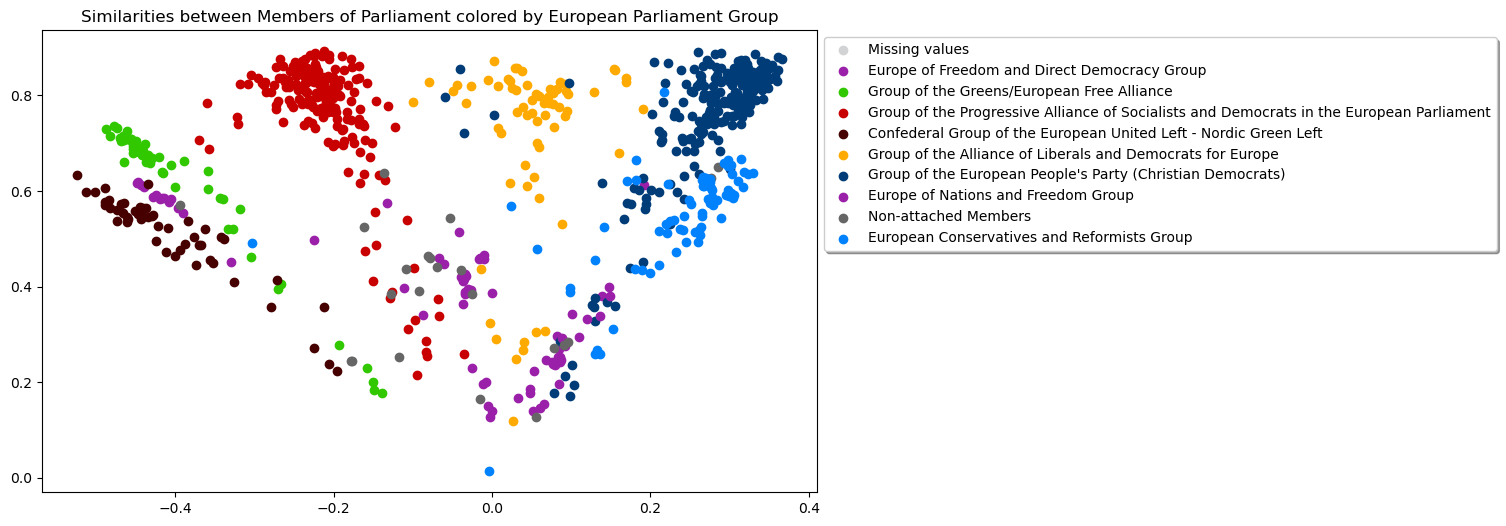

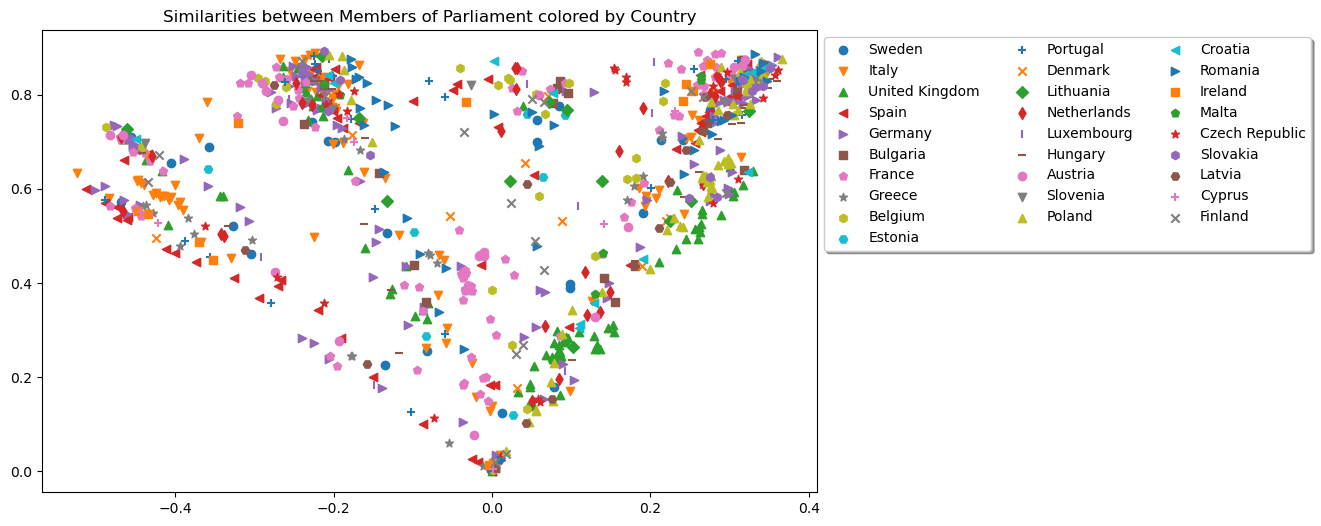

In [ ]:
df = pd.DataFrame({
    'X': -X1_ep8[1, :],
    'Y': X1_ep8[0, :],
    'Country': country_label_ep8.values[sorted_index_ep8],
    'EPG': EPG_label_ep8.values[sorted_index_ep8]
})


# Colors
group_colors = {"Group of the European People's Party (Christian Democrats)": '#003c78',
                'Europe of Freedom and Direct Democracy Group': '#9b20a9',
                'Europe of Nations and Freedom Group': '#9b20a9',
                'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': '#c80000',
                'European Conservatives and Reformists Group': '#0082ff',
                'Group of the Greens/European Free Alliance': '#32c800',
                'Group of the Alliance of Liberals and Democrats for Europe': '#ffaa00',
                'Confederal Group of the European United Left - Nordic Green Left': '#460000',
                'Non-attached Members': '#666666',
                 np.nan: '#d1d3d4'
                }
# Scatter plot for EPG
plt.figure(figsize=(10, 6))
for i,group in enumerate(df['EPG'].unique()):
    if i==0:
        plt.scatter(df[df['EPG'] == group]['X'], df[df['EPG'] == group]['Y'], label='Missing values', color=group_colors[group])
    else:
        plt.scatter(df[df['EPG'] == group]['X'], df[df['EPG'] == group]['Y'], label=group, color=group_colors[group])
plt.title('Similarities between Members of Parliament colored by European Parliament Group')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
plt.show()

# Markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
# Scatter plot for Countries
plt.figure(figsize=(10, 6))
for i, country in enumerate(df['Country'].unique()):
    plt.scatter(df[df['Country'] == country]['X'], df[df['Country'] == country]['Y'], marker=markers[i % len(markers)], label=country)
plt.title('Similarities between Members of Parliament colored by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=3)
plt.show()

# Data set EP9: 2019-2022

## Data acquisition

In [ ]:
data_ep9 = pd.read_excel('EP9_RCVs_2022_06_22.xlsx', header=0, usecols='A,F,H,K:SXA', index_col=0)

In [ ]:
data_ep9.head()

,Country,EPG,1,2,3,4,5,6,7,8,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
197490,Poland,EPP,5,2,1,2,2,1,1,1,...,2,2,2,1,1,2,1,2,1,1
189525,Bulgaria,EPP,5,2,1,1,1,1,1,1,...,2,2,2,1,2,2,1,2,1,1
124831,Italy,EPP,3,3,3,3,3,1,2,1,...,2,2,2,1,2,2,1,2,1,1
197826,Italy,IDG,2,2,2,2,2,2,2,1,...,2,2,1,2,2,1,1,3,2,1
197403,Malta,S&D,4,1,1,1,1,2,2,1,...,3,3,1,2,2,2,3,3,2,1


In [ ]:
data_ep9.describe()

,1,2,3,4,5,6,7,8,9,10,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,3.244143,1.933416,1.733662,1.717633,1.604192,1.789149,1.796547,1.660912,1.695438,1.726264,...,2.171393,2.183724,1.982737,1.715166,2.145499,1.948212,1.717633,2.101110,1.752158,1.678175
std,1.633620,1.370953,1.354677,1.346389,1.218148,1.231753,1.243963,1.349783,1.241153,1.311502,...,1.232871,1.243067,1.319258,1.323670,1.313196,1.270669,1.368219,1.241121,1.355002,1.552777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
print(f'There is missing values True/False: {data_ep9.isnull().any().any()}')
index_to_drop = data_ep9.iloc[np.where(data_ep9.isnull())[0]].index
print(f'Number of missing values: {len(index_to_drop)}')
data_ep9.drop(index_to_drop, inplace=True)

There is missing values True/False: True
Number of missing values: 4


There is 4 EPG missing for 4 MEP, we simply deleted them as they are just 4.

## Data processing

In [ ]:
country_label_ep9 = data_ep9['Country']
EPG_label_ep9 = data_ep9['EPG']

In [ ]:
country_label_ep9

WebisteEpID
197490         Poland
189525       Bulgaria
124831          Italy
197826          Italy
197403          Malta
             ...     
228286        Germany
229519    Netherlands
230085          Italy
229839        Germany
233862       Slovenia
Name: Country, Length: 807, dtype: object

In [ ]:
EPG_label_ep9

WebisteEpID
197490    EPP
189525    EPP
124831    EPP
197826    IDG
197403    S&D
         ... 
228286    S&D
229519    REG
230085    S&D
229839    S&D
233862    S&D
Name: EPG, Length: 807, dtype: object

In [ ]:
Votes_ep9 = data_ep9.drop(['Country', 'EPG'], axis=1)

In [ ]:
Votes_ep9

,1,2,3,4,5,6,7,8,9,10,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
WebisteEpID,,,,,,,,,,,,,,,,,,,,,
197490,5,2,1,2,2,1,1,1,1,1,...,2,2,2,1,1,2,1,2,1,1
189525,5,2,1,1,1,1,1,1,1,1,...,2,2,2,1,2,2,1,2,1,1
124831,3,3,3,3,3,1,2,1,2,3,...,2,2,2,1,2,2,1,2,1,1
197826,2,2,2,2,2,2,2,1,1,5,...,2,2,1,2,2,1,1,3,2,1
197403,4,1,1,1,1,2,2,1,1,1,...,3,3,1,2,2,2,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228286,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
229519,0,0,0,0,0,0,0,0,0,0,...,2,2,1,2,2,1,1,2,3,1
230085,0,0,0,0,0,0,0,0,0,0,...,3,3,3,1,3,2,1,2,1,1


In [ ]:
# new_Votes_ep9 = Votes_ep9[np.random.choice(Votes_ep9.columns, size=5000, replace=False)]

## Gram matrix computation

In [ ]:
S1_ep9 = similarity_function_1(Votes_ep9)
X1_ep9, sorted_index_ep9 = eigendecomposition(S1_ep9)

# S2_ep9 = similarity_function_2(Votes_ep9)
# X2_ep9 = eigendecomposition(S2_ep9)

100%|██████████| 807/807 [02:47<00:00,  4.81it/s]


In [ ]:
# EPG_label_ep9.unique()

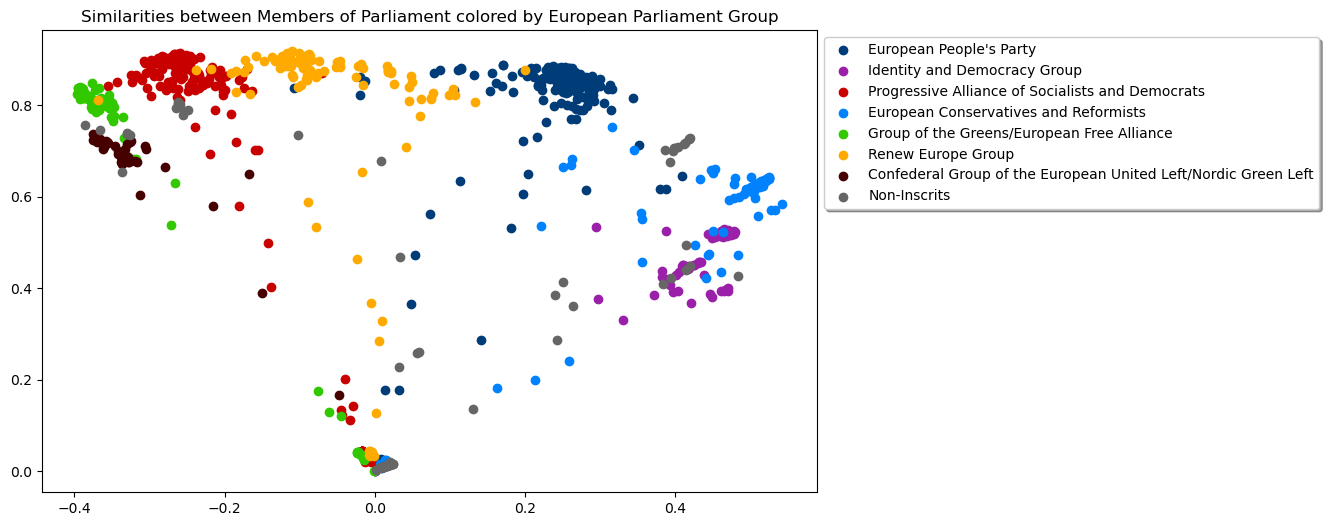

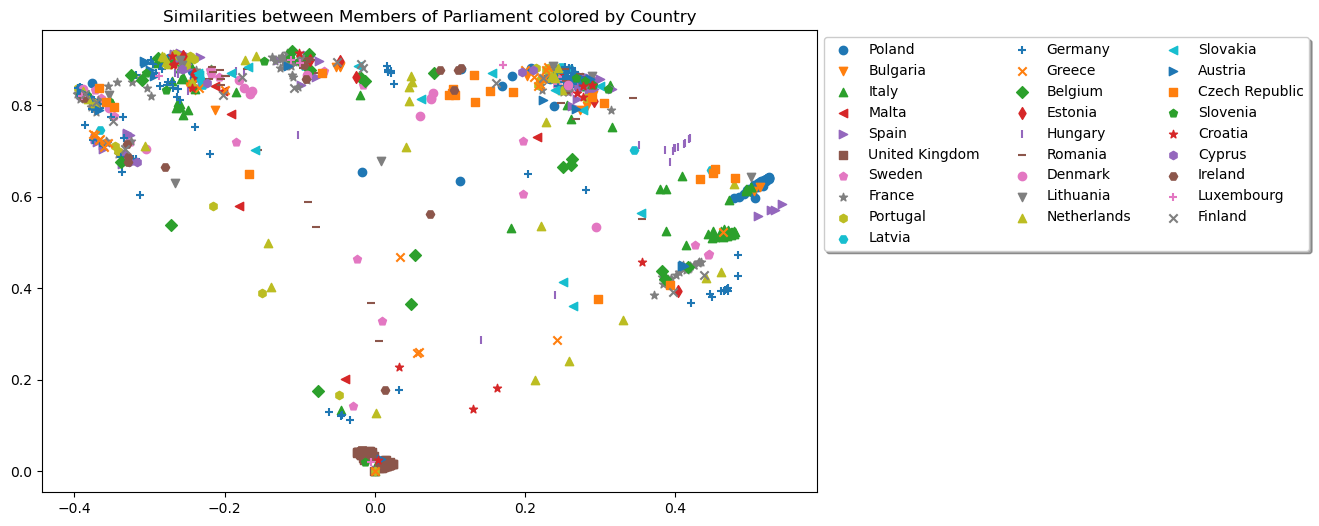

In [ ]:
df = pd.DataFrame({
    'X': X1_ep9[1, :],
    'Y': X1_ep9[0, :],
    'Country': country_label_ep9.values[sorted_index_ep9],
    'EPG': EPG_label_ep9.values[sorted_index_ep9]
})


#Labels
group_labels = {'EPP': "European People's Party",
                'IDG': 'Identity and Democracy Group',
                'S&D': 'Progressive Alliance of Socialists and Democrats',
                'ECR': 'European Conservatives and Reformists',
                'Greens/EFA': 'Group of the Greens/European Free Alliance',
                'REG': 'Renew Europe Group',
                'The Left': 'Confederal Group of the European United Left/Nordic Green Left',
                'NI': 'Non-Inscrits'
                }

# Colors
group_colors = {'EPP': '#003c78',
                'IDG': '#9b20a9',
                'S&D': '#c80000',
                'ECR': '#0082ff',
                'Greens/EFA': '#32c800',
                'REG': '#ffaa00',
                'The Left': '#460000',
                'NI': '#666666'
                }
# Scatter plot for EPG
plt.figure(figsize=(10, 6))
for group in df['EPG'].unique():
    plt.scatter(df[df['EPG'] == group]['X'], df[df['EPG'] == group]['Y'], label=group_labels[group], color=group_colors[group])
plt.title('Similarities between Members of Parliament colored by European Parliament Group')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
plt.show()

# Markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
# Scatter plot for Countries
plt.figure(figsize=(10, 6))
for i, country in enumerate(df['Country'].unique()):
    plt.scatter(df[df['Country'] == country]['X'], df[df['Country'] == country]['Y'], marker=markers[i % len(markers)], label=country)
plt.title('Similarities between Members of Parliament colored by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=3)
plt.show()